In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import os
import glob

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [4]:
os.chdir('/home/mike/repos/agnfinder')
# sotiria, change this to repo loc

In [21]:
params = ['mass', 'dust2', 'tage', 'tau', 'agn_disk_scaling', 'agn_eb_v', 'agn_torus_scaling']
save_dir = 'results/emulated_sampling/real'

galaxy_locs = glob.glob(save_dir + '/galaxy*.h5')
assert galaxy_locs

sample_list = []
for n, galaxy_loc in enumerate(galaxy_locs):
    f = h5py.File(galaxy_loc, mode='r')
    sample_list.append(np.squeeze(f['samples'][...]))

n_samples = sample_list[0].shape[0]
samples = np.stack(sample_list, axis=1)

In [22]:
samples.shape

(2000, 33, 7)

In [23]:
rf_classes = ['passive', 'starforming', 'starburst', 'agn', 'qso', 'outlier']
rf_cols = [f'Pr[{c}]_case_III' for c in rf_classes]
labels = pd.read_parquet('data/uk_ir_selection.parquet')

In [24]:
labels['most_likely_rf_class'] = df[rf_cols].apply(lambda x: rf_classes[np.argmax(x.values)], axis=1)
labels['most_likely_rf_class'].value_counts()

passive        9
starforming    7
qso            7
starburst      6
agn            5
Name: most_likely_rf_class, dtype: int64

In [27]:
data = []
for n, galaxy in enumerate(sample_list):
        temp_df = pd.DataFrame(galaxy, columns=params)
        temp_df['galaxy_class'] = labels.iloc[n]['most_likely_rf_class']
        data.append(temp_df)
raw_df = pd.concat(data).reset_index()
del data

In [28]:
raw_df.head()

,index,mass,dust2,tage,tau,agn_disk_scaling,agn_eb_v,agn_torus_scaling,galaxy_class
0,0,0.699442,0.334510,0.822438,0.064211,0.180663,0.617742,0.415263,starforming
1,1,0.693580,0.316421,0.819310,0.067648,0.179789,0.618496,0.420716,starforming
2,2,0.698599,0.327909,0.821654,0.066653,0.179288,0.630585,0.417532,starforming
3,3,0.699468,0.336032,0.822563,0.064820,0.173237,0.628121,0.404138,starforming
4,4,0.698433,0.314438,0.823430,0.066419,0.177711,0.636025,0.400118,starforming


In [29]:
len(raw_df)

66000

In [31]:
df = raw_df

In [ ]:
# free_params = ['mass', 'dust2', 'tage', 'agn_eb_v', 'agn_torus_mass']
# log_params = ['mass', 'agn_mass', 'tau']

/media/mike/Windows/linux_cache/miniconda37/envs/agnfinder/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/media/mike/Windows/linux_cache/miniconda37/envs/agnfinder/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/media/mike/Windows/linux_cache/miniconda37/envs/agnfinder/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


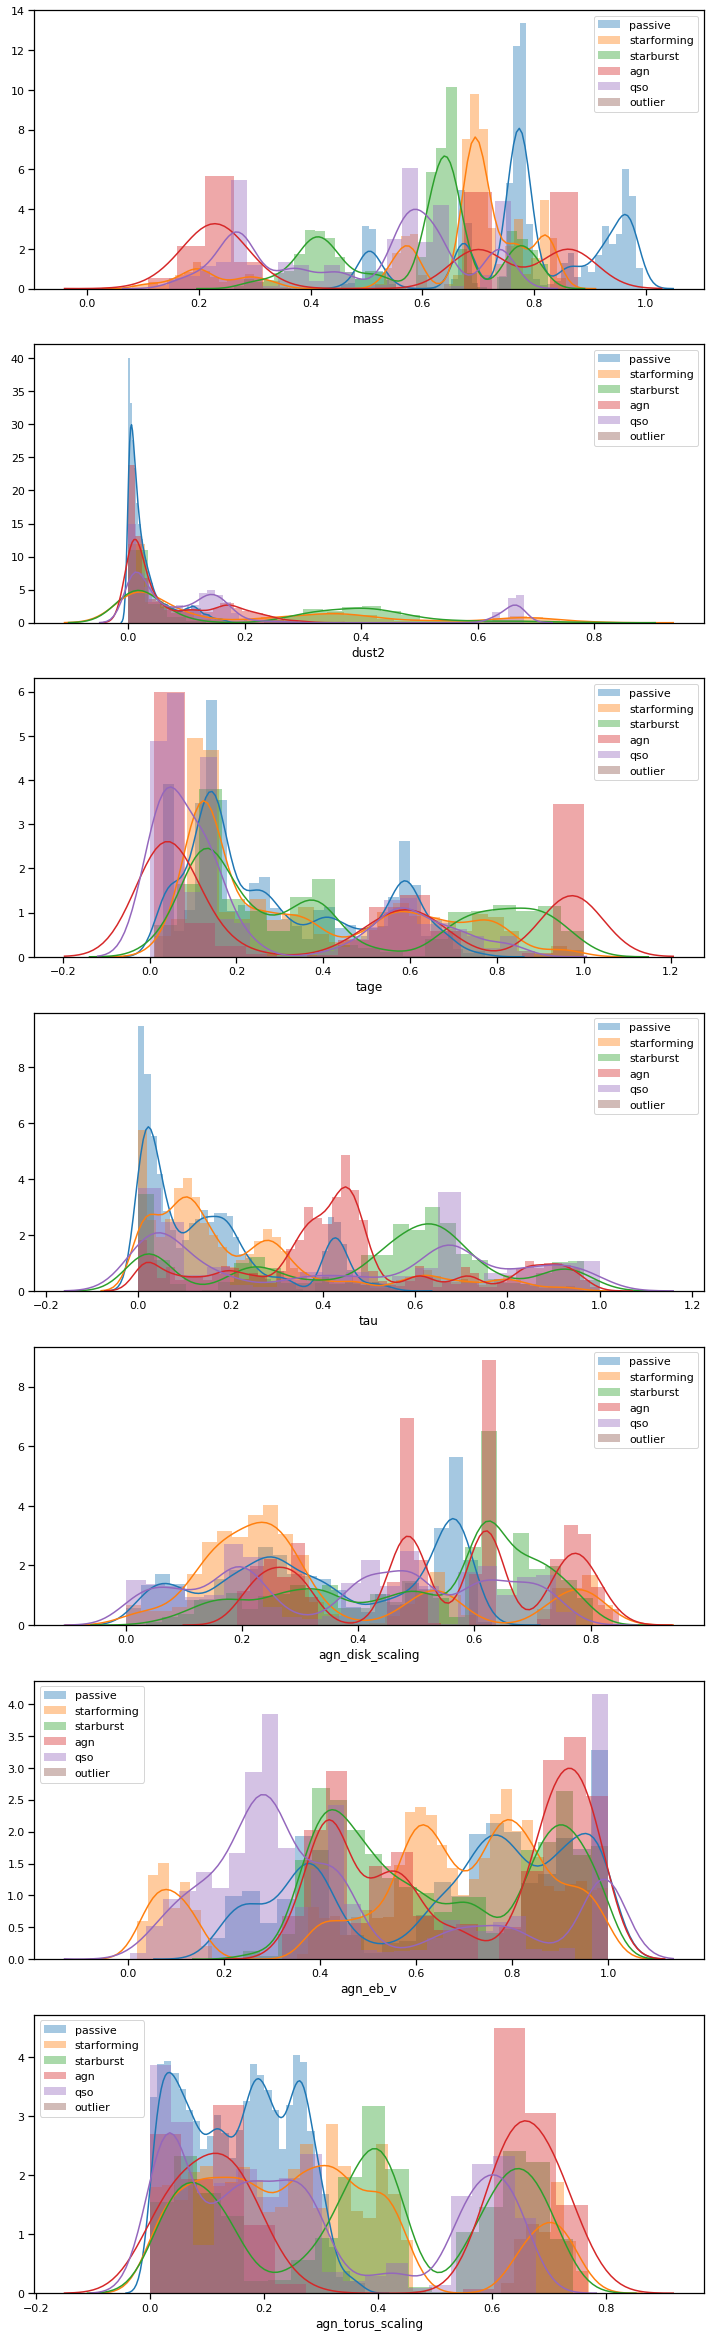

In [33]:
nrows = len(params)
fig, axes = plt.subplots(nrows=nrows, figsize=(12, 6 * nrows))
for ax_n, ax in enumerate(axes):
    feature = params[ax_n]
    #  _ = sns.catplot(data=df, x='galaxy_class', y=feature, kind="violin", ax=ax)
    for galaxy_class in rf_classes:
        values = df[df['galaxy_class'] == galaxy_class][feature]
#         if feature in log_params:
#             values = np.log10(values)
        sns.distplot(values, label=galaxy_class, ax=ax)
        ax.legend()
#     ax.set_ylim(limits[feature])
# print('done')